### Exploratory Data Analysis on Steam Reviews

* [Import Libraries ](#section-1)
* [Read Data](#section-2)
* [Exploratory Data Analysis](#section-3)
    - [Summary Statistics, Missing values, Duplicates, etc.](#subsection-1)
    - [Plots](#subsection-2)
* [Word Clouds](#section-4)
 


<a id="section-1"></a>
### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import Counter
from wordcloud import WordCloud 

<a id="section-2"></a>
### Read Data

In [2]:
df_reviews = pd.read_csv('/kaggle/input/steam-reviews/dataset.csv')
df_reviews.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [3]:
# size of dataframe
df_reviews.shape

(6417106, 5)

<a id="section-3"></a>
### Exploratory Data Analysis

<a id="subsection-1"></a>
#### Summary Statistics

In [4]:
df_reviews.describe(include='all')

,app_id,app_name,review_text,review_score,review_votes
count,6.417106e+06,6233872,6409801,6.417106e+06,6.417106e+06
unique,NaN,9363,4473473,NaN,NaN
top,NaN,PAYDAY 2,Early Access Review,NaN,NaN
freq,NaN,88973,1013351,NaN,NaN
mean,2.274695e+05,NaN,NaN,6.394992e-01,1.472446e-01
std,1.260451e+05,NaN,NaN,7.687918e-01,3.543496e-01
min,1.000000e+01,NaN,NaN,-1.000000e+00,0.000000e+00
25%,2.018100e+05,NaN,NaN,1.000000e+00,0.000000e+00
50%,2.391600e+05,NaN,NaN,1.000000e+00,0.000000e+00
75%,3.056200e+05,NaN,NaN,1.000000e+00,0.000000e+00


#### Missing values

In [5]:
# is there any missing values?
df_reviews.isnull().values.any()

True

In [6]:
# count of missing values by column
df_reviews.isnull().sum()

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

In [7]:
# percentage of missing values by column
round(df_reviews.isnull().mean(), 4) * 100

app_id          0.00
app_name        2.86
review_text     0.11
review_score    0.00
review_votes    0.00
dtype: float64

#### Duplicates

In [8]:
# how many duplicates?
df_reviews[df_reviews.duplicated()].shape[0]

1796102

In [9]:
# drop the duplicates
df_reviews = df_reviews.drop_duplicates(keep='first')

In [10]:
# new DF size
df_reviews.shape

(4621004, 5)

#### Total number of games

In [11]:
df_reviews["app_name"].nunique()

9363

#### Games with most reviews

In [12]:
df_reviews.groupby("app_name", as_index=False)["review_score"].count().rename(columns={'review_score':'Review Count'}).sort_values(by=["Review Count"], ascending=False).head(10)

,app_name,Review Count
7776,Terraria,78276
5579,PAYDAY 2,63577
2349,Dota 2,50190
8630,Undertale,48512
8896,Warframe,44970
6446,Rocket League,39035
4398,Left 4 Dead 2,35406
3409,Grand Theft Auto V,30213
576,Arma 3,29854
957,BioShock Infinite,29770


<a id="subsection-2"></a>
### Plots

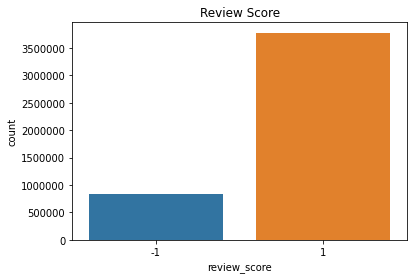

In [13]:
# Review Score
sns.countplot(x="review_score", data=df_reviews).set_title('Review Score')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

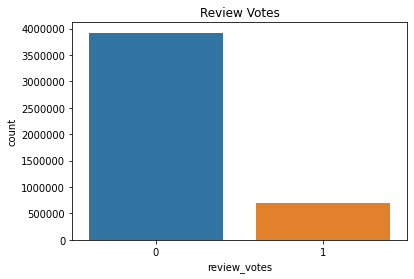

In [14]:
# Review Votes
sns.countplot(x="review_votes", data=df_reviews).set_title('Review Votes')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### Number of reviews per game

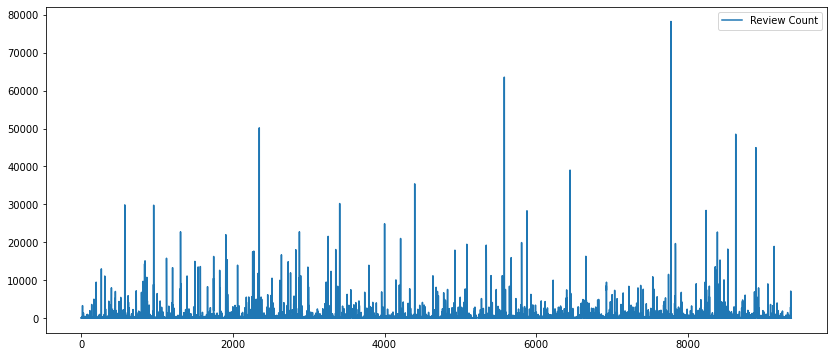

In [15]:
df_reviews.groupby("app_name", as_index=False)["review_score"].count().rename(columns={'review_score':'Review Count'}).plot(figsize=(14,6))
plt.show()

#### Getting the percentage of positive and negative reviews for each game

In [16]:
df_reviews_perc = df_reviews.groupby(["app_name", "review_score"])[["review_text"]].count().rename(columns={'review_text':'Percentage'}).groupby(level=[0]).apply(lambda g: 100*(round(g / g.sum(), 2))).reset_index()

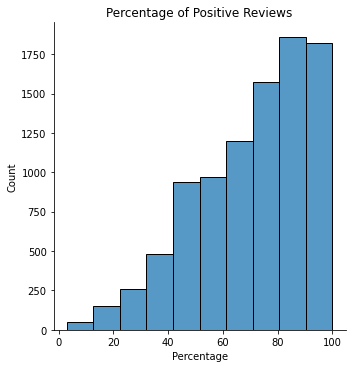

In [17]:
# percentage of positive reviews
sns.displot(df_reviews_perc[df_reviews_perc["review_score"]==1]["Percentage"], kde=False, bins=10)
plt.title('Percentage of Positive Reviews')
plt.show()

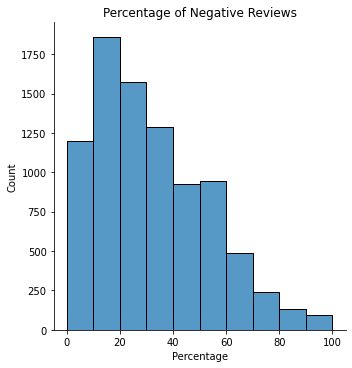

In [18]:
# percentage of negative reviews
sns.displot(df_reviews_perc[df_reviews_perc["review_score"]==-1]["Percentage"], kde=False, bins=10)
plt.title('Percentage of Negative Reviews')
plt.show()

#### Games with less than 10% positive reviews

In [19]:
df_reviews_perc[(df_reviews_perc["review_score"]==1) & (df_reviews_perc["Percentage"] <= 10)].sort_values(by=["Percentage"], ascending=True).head(10)

,app_name,review_score,Percentage
5959,Fray,1,3.0
4686,Drunk Wizards,1,4.0
12011,Recovery Search and Rescue Simulation,1,5.0
9454,Metal Planet,1,5.0
9043,Mafia III: Definitive Edition,1,5.0
8686,Liveza: Death of the Earth,1,5.0
13871,Spaceforce Constellations,1,6.0
800,Alone K.W.,1,6.0
12019,Red Bit Ninja,1,7.0
13682,Solar Struggle,1,7.0


#### Remember that the percentages are based on different number of reviews

In [20]:
df_reviews[(df_reviews["app_name"]=='Fray') | (df_reviews["app_name"]=='Drunk Wizards')].groupby("app_name", as_index=False)["review_score"].count().rename(columns={'review_score':'Review Count'})

,app_name,Review Count
0,Drunk Wizards,28
1,Fray,33


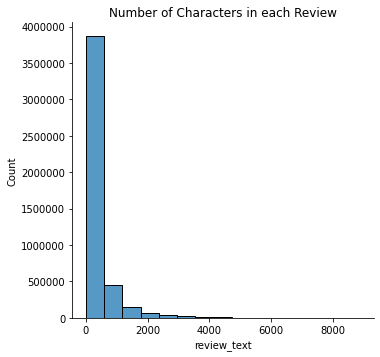

In [21]:
# Number of Characters in each Review
sns.displot(df_reviews["review_text"].str.len(), kde=False, bins=15)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Characters in each Review')
plt.show()

#### Average number of characters in each review

In [22]:
round(df_reviews["review_text"].str.len().mean())

368

<a id="section-4"></a>
### Word Clouds

In [23]:
# convert review texts to string 
df_reviews["review_text"] = df_reviews["review_text"].astype(str)

In [24]:
# define the word cloud function
def WordCloud_generator(data, title=None):
    
    # Keep top 1000 most frequent words
    most_freq = Counter(data).most_common(1000) 
    text = ' '.join([x[0] for x in most_freq])
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10,
                          collocations=False
                         ).generate(text)

    # plot the Word Cloud                      
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

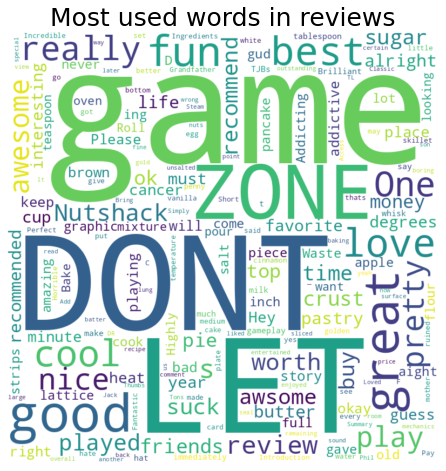

In [25]:
# Most used words in reviews
WordCloud_generator(df_reviews["review_text"], title="Most used words in reviews")

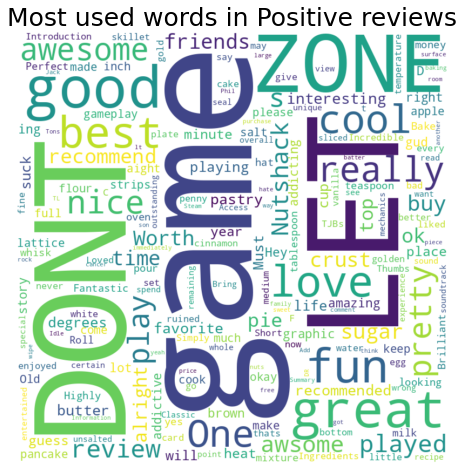

In [26]:
# Most used words in positive reviews
WordCloud_generator(df_reviews[df_reviews["review_score"]==1]["review_text"], title="Most used words in Positive reviews")

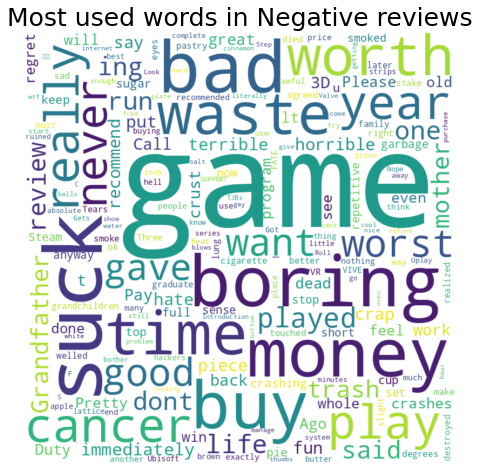

In [27]:
# Most used words in negative reviews
WordCloud_generator(df_reviews[df_reviews["review_score"]==-1]["review_text"], title="Most used words in Negative reviews")

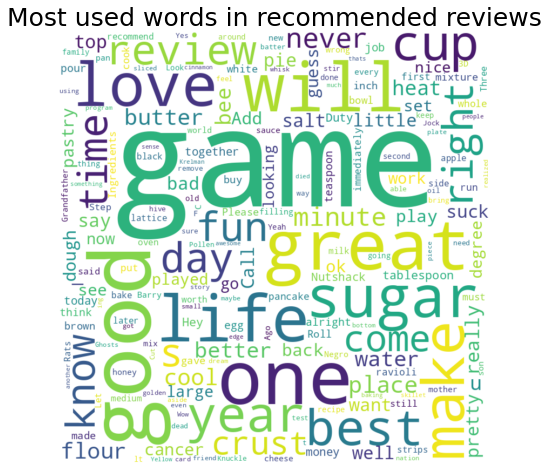

In [28]:
# Most used words in recommended reviews
WordCloud_generator(df_reviews[df_reviews["review_votes"]==1]["review_text"], title="Most used words in recommended reviews")